<a href="https://colab.research.google.com/github/umiSirya/MachineLearning_2/blob/main/Gaussian_Mixture_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is a Gaussian Mixture Model (GMM)?
**Probabilistic Model**

A GMM is a probabilistic model that assumes your data points come from a mixture of multiple Gaussian distributions (also known as normal distributions). Each Gaussian distribution represents a cluster or subpopulation within your data.  

**Soft Clustering**

Unlike k-means clustering, which assigns each data point to a single cluster, GMM provides a "soft" assignment. This means each data point has a probability of belonging to each of the Gaussian components.  

**Key Components**

*Gaussian Components:* Each component is characterized by its mean (center) and covariance matrix (shape and orientation).  

*Mixing Weights:* These weights determine the proportion of data points that are likely to belong to each component.  

**Applications**

*Clustering:* Identifying groups or patterns within your data.

*Density Estimation:* Estimating the probability density function of your data.  

*Anomaly Detection:* Identifying data points that are significantly different from the rest.  

*Feature Engineering:* Creating new features based on the GMM components.  

**How does GMM work?**

Initialization:


Choose the number of Gaussian components (K).
Initialize the parameters of each component (means, covariances, mixing weights) randomly.  
Expectation-Maximization (EM) Algorithm:


Expectation (E) step:

Calculate the probability of each data point belonging to each component.  
Maximization (M) step: Update the parameters of each component to maximize the likelihood of the data given the current component assignments.  
Repeat:


Iterate between the E and M steps until the parameters converge or a stopping criterion is met.  
Example:
Imagine you have a dataset of customer purchase histories. A GMM could be used to:
Identify different customer segments (e.g., frequent buyers, occasional buyers, high-value customers).  


Predict the likelihood of a customer making a purchase.
Detect unusual purchasing behavior that might indicate fraud.




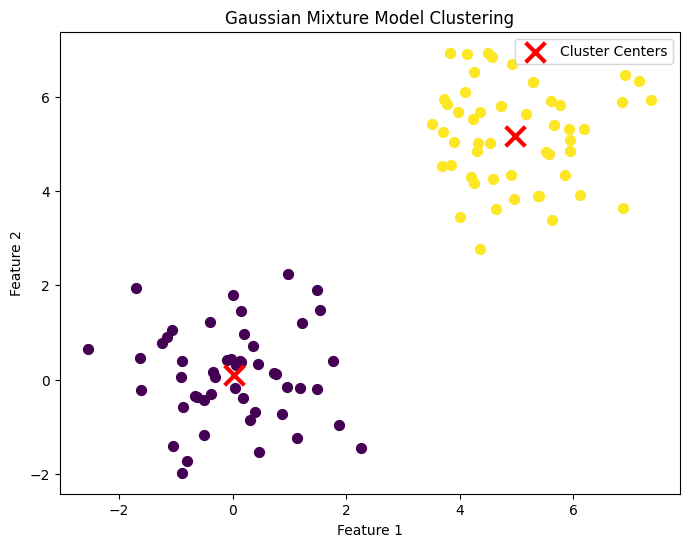

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data (two overlapping Gaussian distributions)
np.random.seed(0)
data1 = np.random.randn(50, 2) + np.array([0, 0])
data2 = np.random.randn(50, 2) + np.array([5, 5])
data = np.vstack((data1, data2))

# Create a GaussianMixture object with 2 components
gmm = GaussianMixture(n_components=2, random_state=0)

# Fit the model to the data
gmm.fit(data)

# Get predicted probabilities for each data point belonging to each component
probs = gmm.predict_proba(data)

# Get cluster assignments (hard clustering)
labels = gmm.predict(data)

# Visualize the results
plt.figure(figsize=(8, 6))

# Plot the data points with colors based on predicted probabilities
for i, prob in enumerate(probs):
    color = plt.cm.viridis(prob[0])  # Use viridis colormap for better visualization
    plt.scatter(data[i, 0], data[i, 1], color=color, s=50)

# Plot the cluster centers
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='r', label='Cluster Centers')

plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()